# Predicting Heart Disease using Machine Learning 

This notebook looks into using various python-based machine learning and data science libraries in an attemp to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentaion

## 1. Problem Definition
In a statement 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease or not?

## 2. Data
The original data comes from cleavlnad data from UCI Machine Learning Repo - https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it in kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart-disease during the proof of concept, we will pursue it

## 4. Features

** Creating data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Preparing the tools
We are going to use pandas, matplotlib and numpy for data manipulation

In [1]:
#Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Plot appear inside notebook
%matplotlib inline 

#Models for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models for evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, RocCurveDisplay

### Loading data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [7]:
df.isnull().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
Name: count, dtype: int64

## Heart Disease Frequency according to Sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


The above result shows that 72/100 shows that, around 75% females have heart disease

Just by looking at this we can, when a new entry comes, if a female comes she has 75 chance she has a heart disease

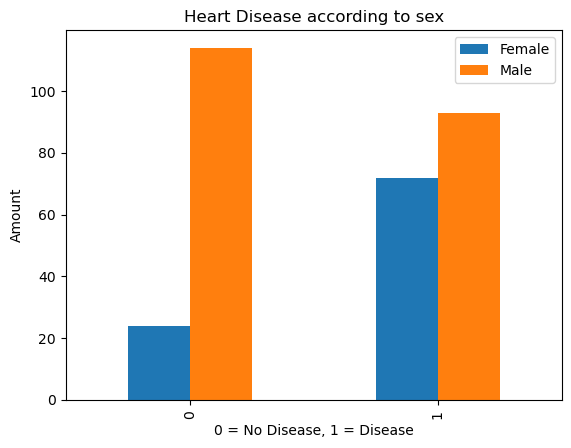

In [24]:
# Create a plot on this
ax = pd.crosstab(df.target, df.sex).plot(kind = "bar");
plt.xlabel("0 = No Disease, 1 = Disease")
plt.title("Heart Disease according to sex")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

## Comapring age vs disease

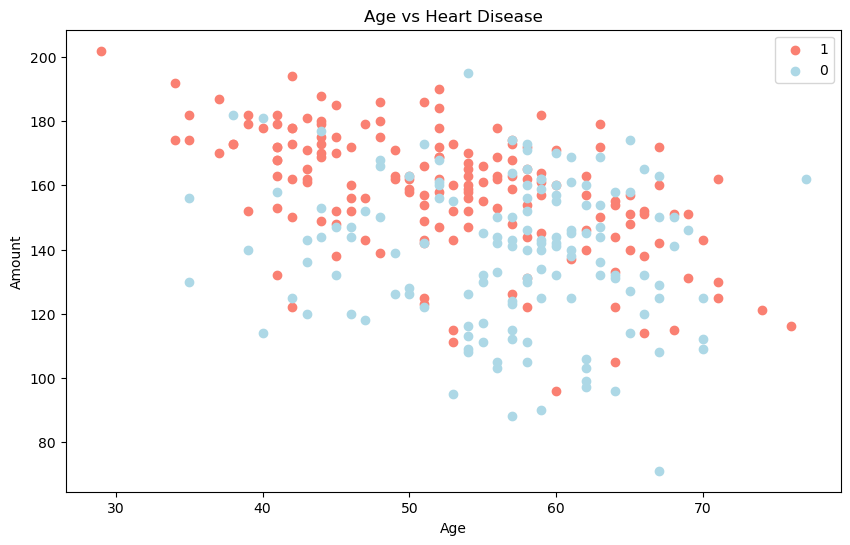

In [13]:
plt.figure(figsize = (10, 6))

ax = plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
           c = "salmon");

ax2 = plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
           c = "lightblue");
plt.xlabel("Age");
plt.ylabel("Amount");
plt.title("Age vs Heart Disease");
plt.legend(["1", "0"]);
plt.show()


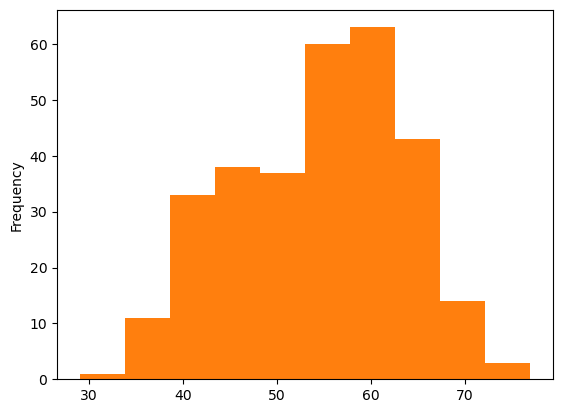

In [15]:
# Seeing the spread using histogram 
df.age.plot.hist();
plt.show()

### Heart disease frequency for chest pain type

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


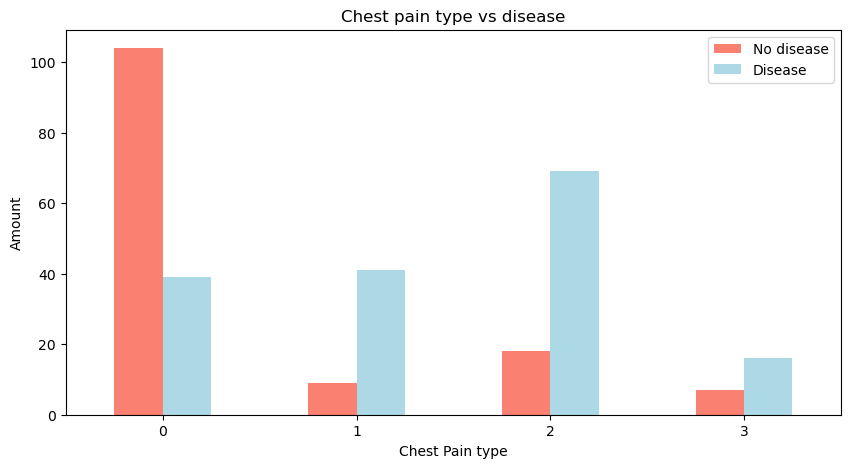

In [24]:
ax = pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                        figsize = (10, 5),
                                        color = ["salmon", "lightblue"]);
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.title("Chest pain type vs disease")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation = 0)
plt.show()

In [25]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


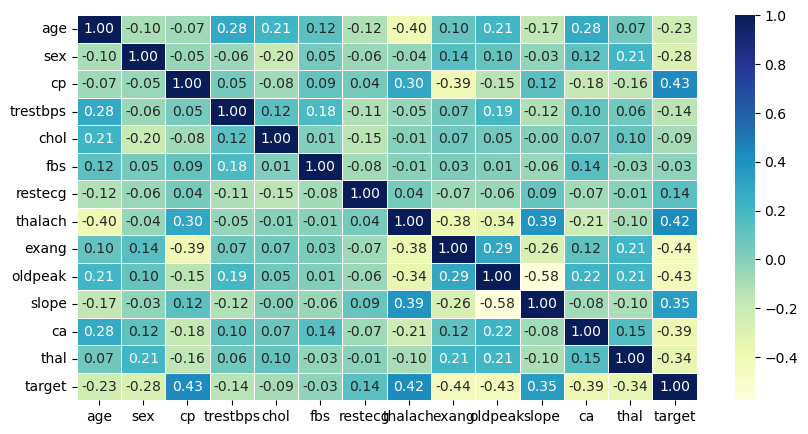

In [32]:
# Visulazing this
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (10, 5));
ax = sns.heatmap(corr_mat, 
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");
plt.xticks(rotation = 0);
plt.show()

## Modeling 

In [9]:
#splitting test and train set
x = df.drop("target", axis = 1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [10]:
len(x_train), len(y_train)

(242, 242)

### We will be trying 3 different models 

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [11]:
# Creating dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN" :KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

#Function to fit a score and models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fit and evaluate the model
    '''
    np.random.seed(42)

    model_scores = {}
    #Fitting the model and evaluating the score
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

In [12]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\veena\miniconda3\envs\heart_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

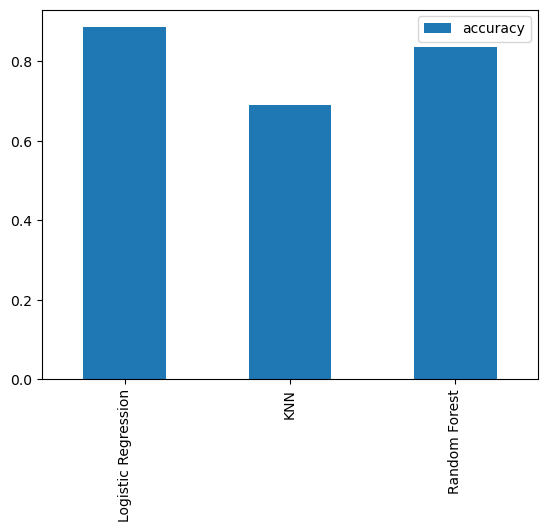

In [13]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
ax = model_compare.T.plot(kind = "bar");
plt.show()

### Hyper parameter tuning 

In [15]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

#loop thorugh neighbors to imporve score
for i in neighbors:
    knn.set_params(n_neighbors = i)

    #Fit the algorithm
    knn.fit(x_train, y_train)

    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [16]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

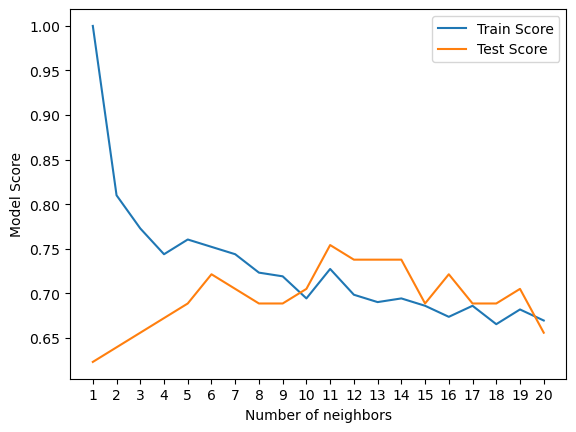

Maximum KNN score is 75.41


In [17]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()

print(f"Maximum KNN score is {max(test_scores)*100:.2f}")

## Hyperparameter tuning for Logistic Regression using RandomizedSearchCV

In [18]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#hyperparameter grid for classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_leaf": np.arange(1, 20 , 2)}

In [19]:
#Tuning LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               cv = 5,
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               verbose = True)
#Fit the model and see the score
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [21]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Lets do the same for randomforest()

In [22]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          cv = 5,
                          param_distributions = rf_grid,
                          n_iter = 20, 
                          verbose = True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf.best_params_

{'n_estimators': np.int64(760),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [24]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

In [27]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### Evaluating the model 

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1 score

....use cross validation whenever possible 

In [30]:
y_preds = gs_log_reg.predict(x_test)

In [31]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [34]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


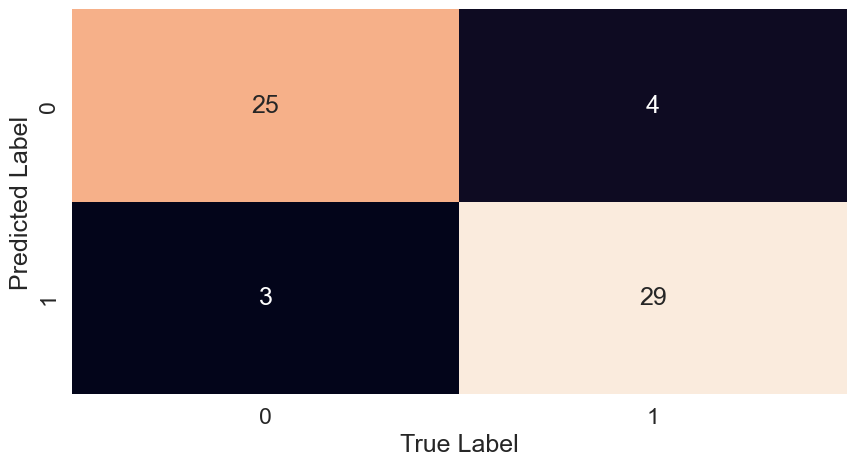

In [36]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    '''
    Plots a neat confusion matrix using seaborn library 
    '''

    fig, ax = plt.subplots(figsize = (10, 5))
    ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()

plot_conf_mat(y_preds, y_test)

In [37]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### Caculate evalutation metrics using cross-validation 

we are going to calcuate precision, recall, f1-score of our model using cross validation

In [38]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")



In [42]:
cv_acc = cross_val_score(clf, 
                        x,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [43]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [45]:
cv_pre = cross_val_score(clf, 
                        x,
                        y,
                        cv = 5,
                        scoring = "precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [47]:
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

In [48]:
cv_recall = cross_val_score(clf, 
                        x,
                        y,
                        cv = 5,
                        scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [49]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

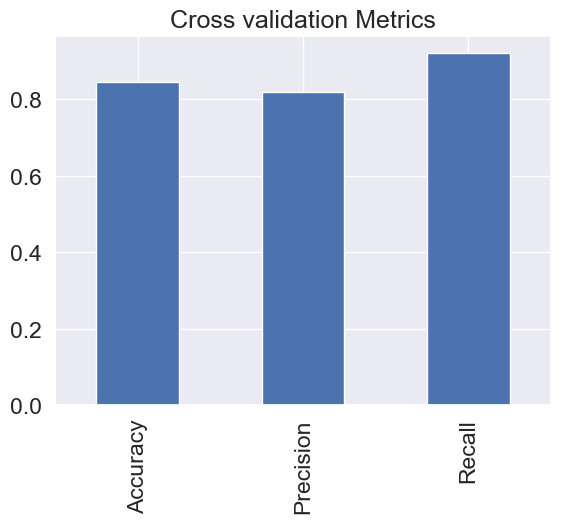

In [57]:
# Visualizing our evaluation
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                           "Recall": cv_recall},
                         index = [0])
ax = cv_metrics.T.plot(kind = "bar", legend = False);
plt.title("Cross validation Metrics");
plt.show()